<a href="https://colab.research.google.com/github/Gilours123/ML/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet de Machine Learning**
**Etude de la classification orthopédique de différentes configuration de colonnes vertébrales**

CHAMPION Charles ; ZUCCHIATTI Virgile

In [3140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Les douleurs de dos sont parmi les problèmes de santé les plus courants et peuvent être liées à des pathologies comme l’hernie discale ou le spondylolisthésis. Les mesures radiologiques du bassin et de la colonne, telles que l’incidence pelvienne, la lordose lombaire ou le pelvic tilt, décrivent la posture et l’équilibre de la base de la colonne vertébrale. En analysant ces paramètres, il devient possible d’identifier des schémas caractéristiques et de prédire la nature des troubles du dos. Ainsi, l’étude des données biomécaniques offre un outil précieux pour améliorer le diagnostic et la compréhension des maux de dos.

Afin de pouvoir en apprendre plus sur les différents types de configurations de vertèbres causant des problèmes de dos, nous avons utilisé un dataset disponible sur Kaggle au lien suivant : [Lien](https://www.kaggle.com/datasets/caesarlupum/vertebralcolumndataset/data?select=column_2C.csv)

La problématique qui se pose alors est la suivante :
# Quelles configurations de la colonne vertébrale sont susceptibles de favoriser l'apparition de pathologies ?

In [3141]:
# Import des librairies
import pandas as pd
import matplotlib
import numpy as np
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
#scikit learn
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Import des datasets

Les données sont téléchargées sur le site Kaggle, sur la page il y a deux tables différents, on a donc deux cellules permettant de télécharger les tables (une cellule par .csv)

Premier .CSV

In [3142]:
# Télécharger le dataset
path = kagglehub.dataset_download("caesarlupum/vertebralcolumndataset")
print("Path to dataset files:", path)

# Nom exact du fichier que l'on veux
csv_file = "column_2C.csv"

# Construire le chemin complet
full_csv_path = os.path.join(path, csv_file)

# Vérifier que le fichier existe
if os.path.exists(full_csv_path):
    df1 = pd.read_csv(full_csv_path)
    print("DataFrame loaded successfully.")
    print(df1.head())
else:
    print(f"Le fichier {csv_file} n'existe pas dans le répertoire: {path}")


Using Colab cache for faster access to the 'vertebralcolumndataset' dataset.
Path to dataset files: /kaggle/input/vertebralcolumndataset
DataFrame loaded successfully.
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


Second .CSV

In [3143]:
# Télécharger le dataset
path = kagglehub.dataset_download("caesarlupum/vertebralcolumndataset")
print("Path to dataset files:", path)

# Nom exact du fichier que l'on veux
csv_file = "column_3C.csv"

# Construire le chemin complet
full_csv_path = os.path.join(path, csv_file)

# Vérifier que le fichier existe
if os.path.exists(full_csv_path):
    df2 = pd.read_csv(full_csv_path)
    print("DataFrame loaded successfully.")
    print(df2.head())
else:
    print(f"Le fichier {csv_file} n'existe pas dans le répertoire: {path}")


Using Colab cache for faster access to the 'vertebralcolumndataset' dataset.
Path to dataset files: /kaggle/input/vertebralcolumndataset
DataFrame loaded successfully.
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  


Pour la suite de l'étude on utilise la seconde table car elle comporte plus de précisions sur la nature des pathologies. (La différence entre les 2 ficheirs réside dans la colonne "class")

# Etude

**La signifiaction des mesures présentes dans les colonnes de la table sont :**

*pelvic_incidence*  =>  Orientation anatomique du bassin (fixe)

*pelvic_tilt*  =>  Bascule du bassin (réglable)

*sacral_slope*  =>  Inclinaison du sacrum

*lumbar_lordosis_angle*  =>  Courbure lombaire

*pelvic_radius*  =>  Distance sacrum–hanches

*degree_spondylolisthesis*  =>  Mesure du glissement vertébral

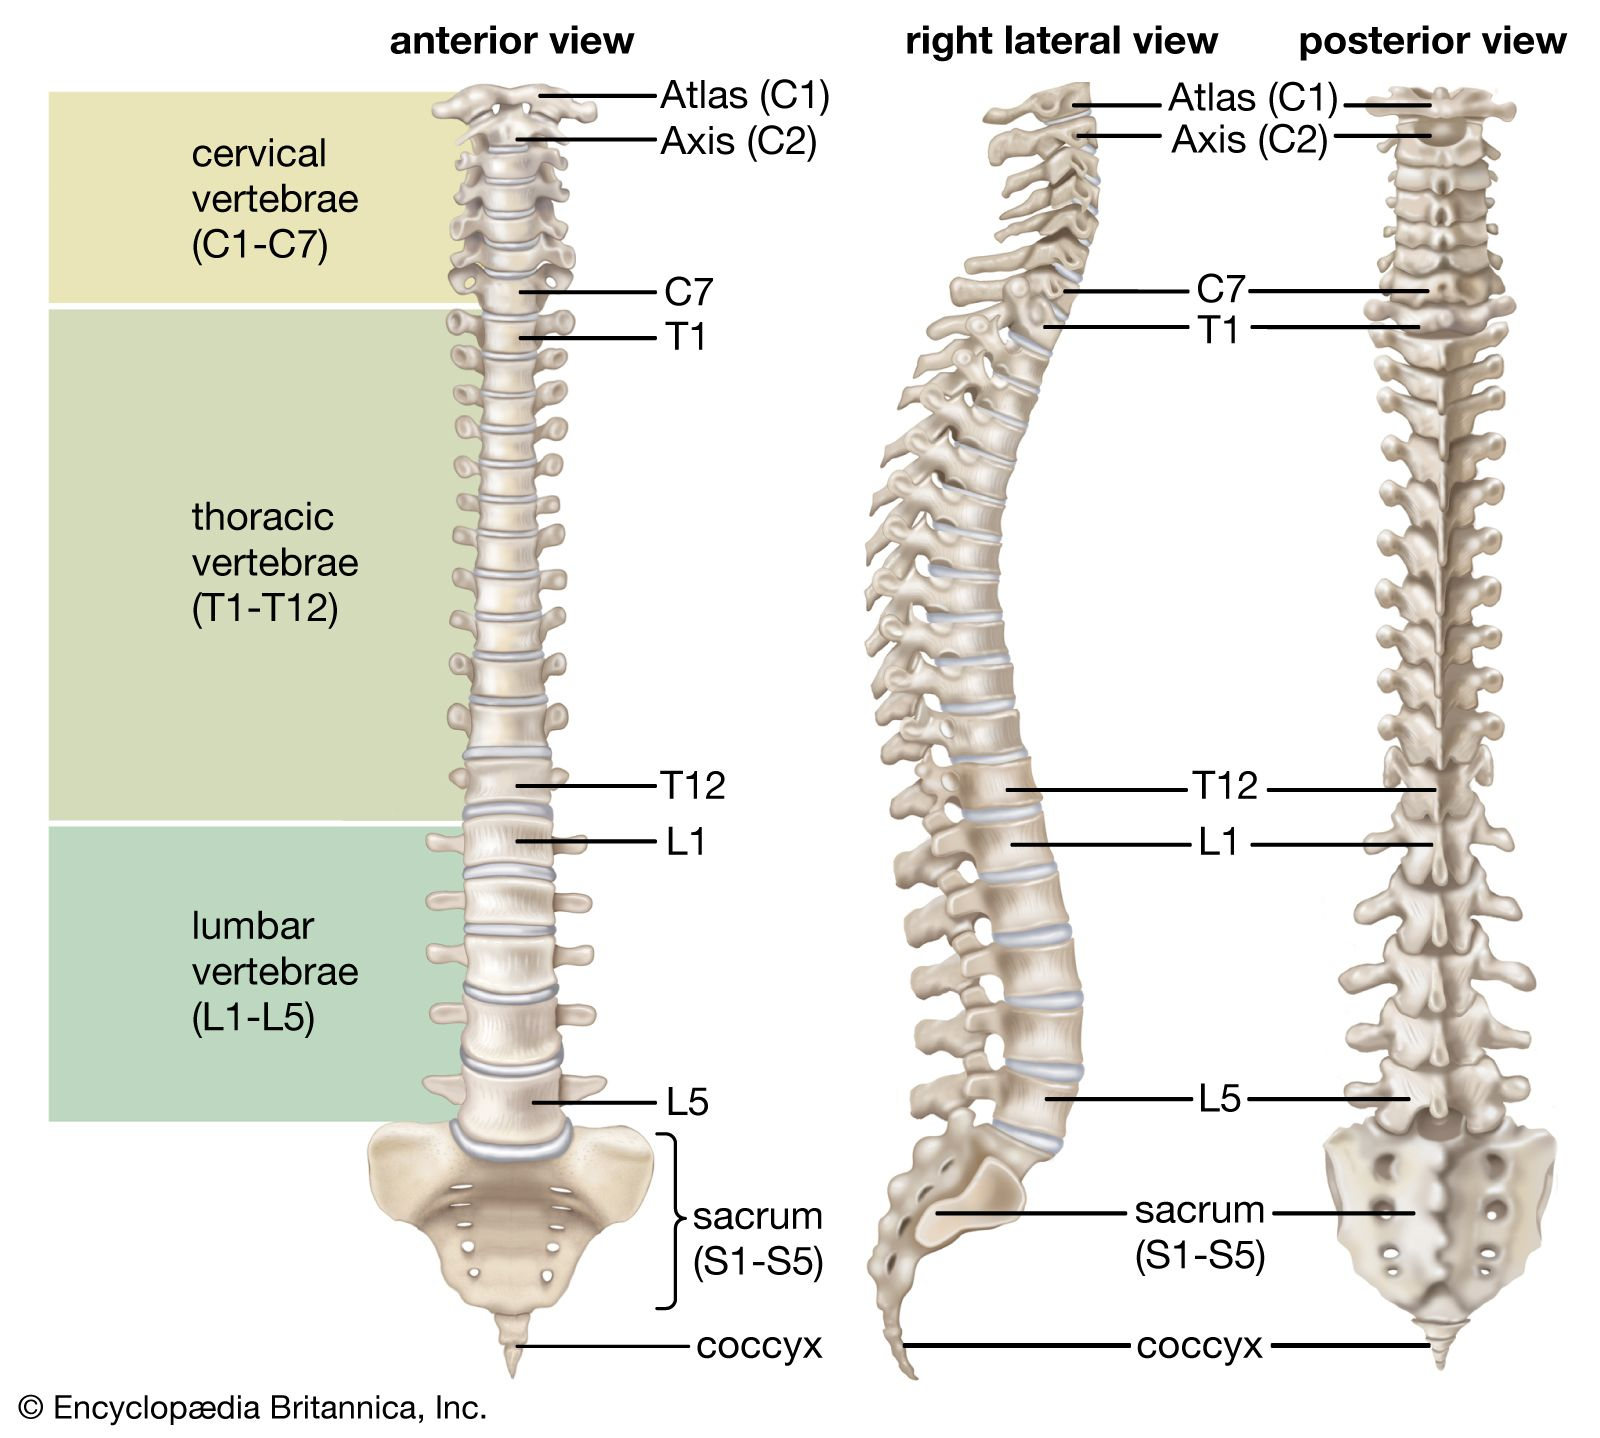

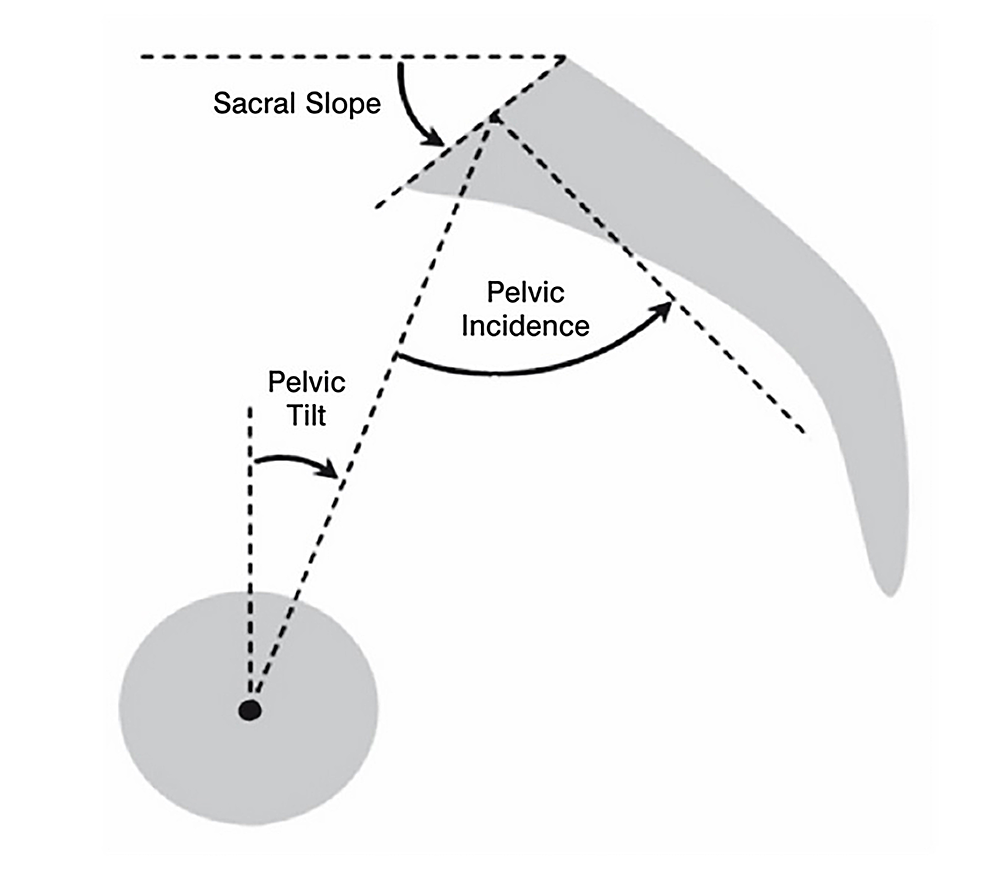

## Présentation générale du dataset

In [3144]:
df2

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


On peut observer que le dataset est composé de 7 colonnes et 310 lignes.

On affiche ensuite les 5 premières lignes du dataset.

In [3145]:
df2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [3147]:
df2.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Avec le .describe() du dataset, on observe plusieurs tendances qui peuvent se traduire en tendances physiologiques.

La variable pelvic_incidence montre qu'il y a une grande diversité anatomique du bassin dans la population étudiée.

La variable pelvic_tilt montre qu'il peut y avoir une forte diversité de posture (la bascule du bassin est influencé par la façon dont se tiennent les gens).

La variable lumbar_lordosis_angle montre que certains patients ont une colonne “plate”, d’autres une hyperlordose (courbure excessive de la colonne).

La variable sacral_slope présente une grande variation, ce qui prouve la présence de différents profils posturaux.

La variable pelvic_radius est assez stable, ce qui reflète une caractéristique morphologique moins influencée par la pathologie.

La variable degree_spondylolisthesis est très variable, ce qui peut se traduire par le fait que de nombreux patients du dataset souffre de pathologies.

In [3148]:
df2['class'].value_counts()
# On compte le nombre de patients souffrants par pathologie

,count
class,
Spondylolisthesis,150
Normal,100
Hernia,60


Les variables présentes dans le dataset sont de types numériques (pour les mesures).

La dernière colonne présente une variable catégorielle qui sera la variable cible lors de l'implémentation du machine learning, on cherchera à savoir la nature de la pathologie des patients.

## Qualité du dataset

On vérifie si il y a des cellules qui sont vides (valeurs manquantes).

In [3149]:
df2.isnull().sum().sum()

np.int64(0)

On observe qu'il ne manque pas de valeurs (la valeur retournée est égale à 0).

On vérifie si il y a des doublons (deux lignes stictement identiques).

In [3150]:
#Affiche les doublons :

df2[df2.duplicated()]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


On observe qu'il n'y a pas de doublon.

Pour chaque colonnes, on vérifie le nombre de valeurs uniques. On fait ça pour vérifier le nombre de répétitions.

In [3151]:
df2.nunique()

,0
pelvic_incidence,310
pelvic_tilt,310
lumbar_lordosis_angle,280
sacral_slope,279
pelvic_radius,310
degree_spondylolisthesis,310
class,3


On observe qu'il y a des répétitions pour les colonnes lumbar_lordosis_angle et sacral_slope.

## Etude des valeurs abberantes

On regarde si il y a des valeurs abberantes.

In [3152]:
# Sélectionner uniquement les colonnes numériques
df_num = df2.select_dtypes(include='number')

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))
df_num[outliers].dropna(how="all")

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
9,NaN,NaN,NaN,NaN,84.241415,NaN
51,NaN,41.557331,NaN,NaN,NaN,NaN
65,NaN,41.286305,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,101.719092
75,NaN,39.822724,NaN,NaN,148.525562,145.378143
76,NaN,NaN,NaN,NaN,NaN,110.860782
83,NaN,NaN,NaN,NaN,151.839857,NaN
84,NaN,42.396204,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,163.071041,NaN
95,NaN,NaN,NaN,NaN,NaN,148.753711


On observe la présence de plusieurs valeurs abberantes dans le dataset.

Pour limiter l'impact des valeurs aberrantes lors de l'étude statistique du dataset, on va utiliser la Winsorisation qui fait exactement ça.

In [3153]:
from scipy.stats.mstats import winsorize

# Sélection des colonnes numériques
df_num = df2.select_dtypes(include='number').copy()

# Winsorisation à 1% aux deux extrémités, le paramètre peut être modifié (limits)
df_winsorized = df_num.apply(lambda col: winsorize(col, limits=[0.04, 0.04]))

On regarde les nouvelles statistiques après winsorisation.

In [3154]:
df_winsorized.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.203721,17.484874,51.855416,42.674264,117.925974,24.549112
std,16.019781,9.280366,17.575930,11.822091,11.811582,27.869591
min,34.756738,1.835524,25.323565,22.579573,94.018783,-4.497958
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,89.504947,38.750670,89.600000,64.358994,139.414504,92.027277


On transfère les données du dataframe Winsorizé dans le dataframe qu'on utilise.

In [3155]:
df2[df_num.columns] = df_winsorized

On revérifie la présence de valeurs abberantes dans le dataset.

In [3156]:
# Sélectionner uniquement les colonnes numériques
df_num = df2.select_dtypes(include='number')

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))
df_num[outliers].dropna(how="all")

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis


On observe qu'il n'y a plus de valeurs abberantes après winsorisation.

# Etude statistique

On regarde la moyenne de chaque paramètres pour chacune des classes :

In [3157]:
df2_means = df2.groupby("class").mean()

df2_means

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,48.074390,17.352017,36.169226,30.877332,116.637924,2.824610
Normal,51.762888,13.033228,43.659541,38.917349,123.746621,2.377588
Spondylolisthesis,70.682677,20.505780,63.593809,49.897646,114.560762,48.019928


Distribution des variables:

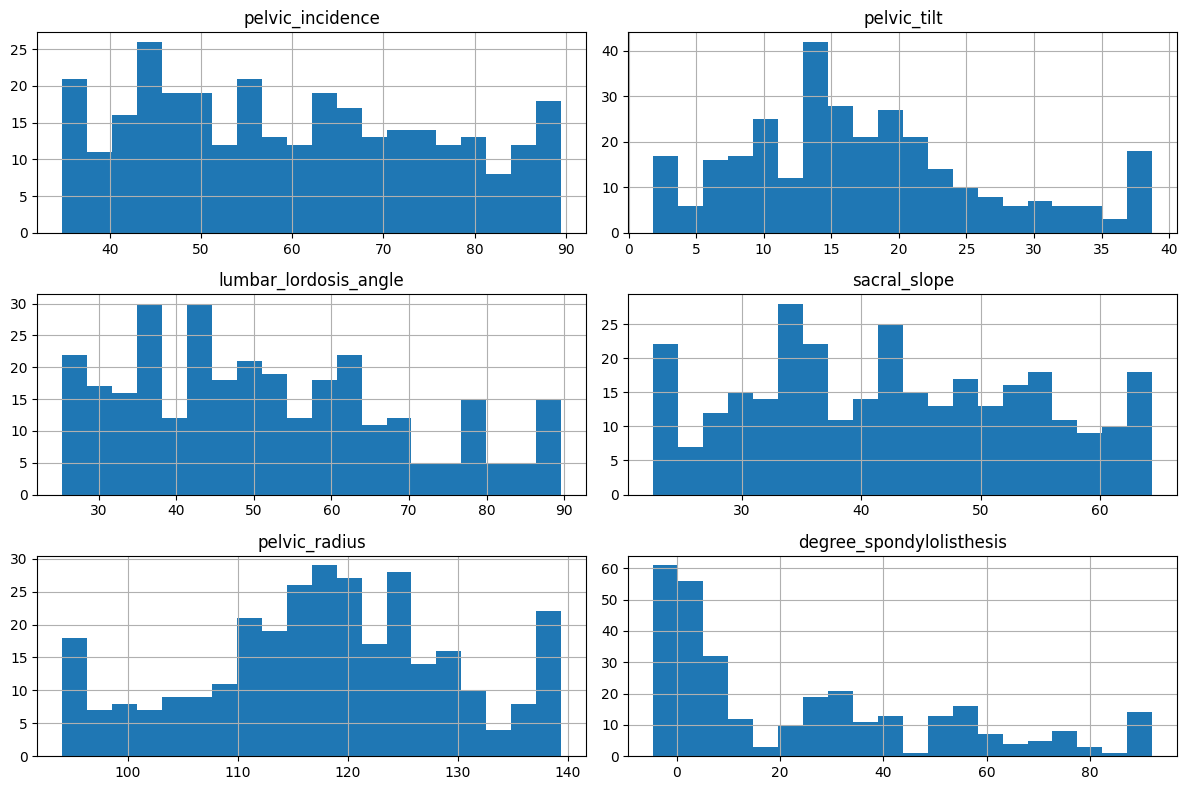

In [3158]:
df2.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

<Axes: xlabel='pelvic_radius', ylabel='Count'>

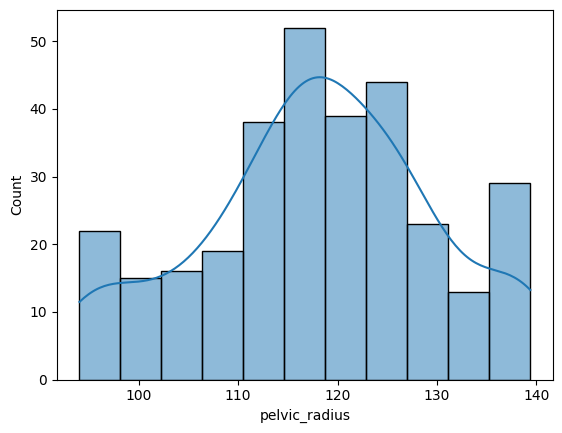

In [3159]:
import seaborn as sns

sns.histplot(df2['pelvic_radius'], kde=True)

## Corrélation entre les variables :

In [3160]:
corr = df2.corr(numeric_only=True)
corr

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.662501,0.764119,0.795554,-0.242660,0.684322
pelvic_tilt,0.662501,1.000000,0.452077,0.094333,0.034118,0.517244
lumbar_lordosis_angle,0.764119,0.452077,1.000000,0.659733,-0.094596,0.693758
sacral_slope,0.795554,0.094333,0.659733,1.000000,-0.361749,0.489301
pelvic_radius,-0.242660,0.034118,-0.094596,-0.361749,1.000000,-0.070703
degree_spondylolisthesis,0.684322,0.517244,0.693758,0.489301,-0.070703,1.000000


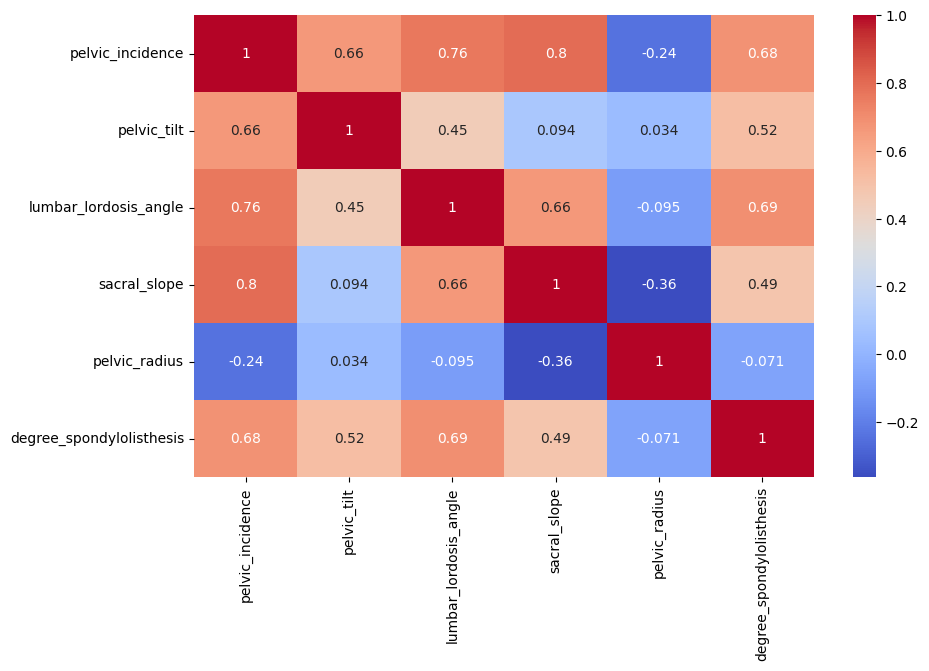

In [3161]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Etude relations cible/features :

<Figure size 1200x800 with 0 Axes>

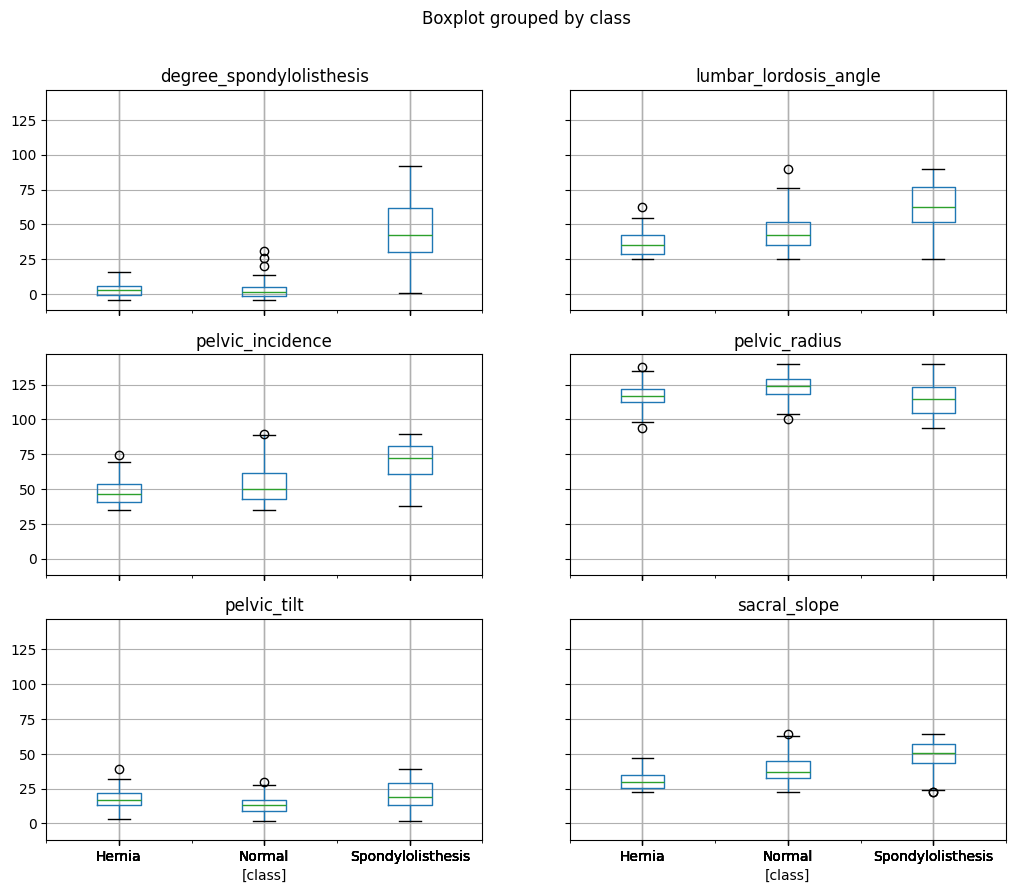

In [3162]:
plt.figure(figsize=(12,8))
df2.boxplot(by='class', figsize=(12,10))
plt.show()


cas par cas, code à adapter :

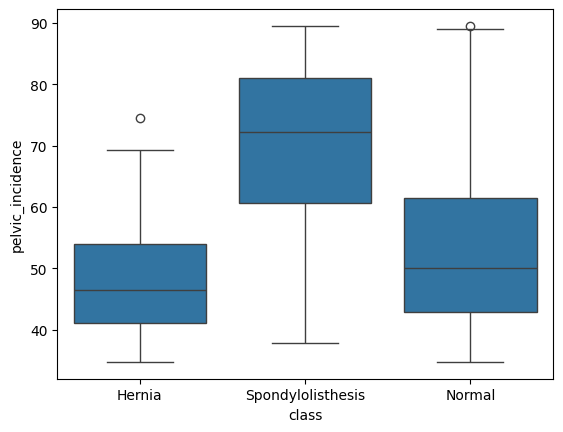

In [3163]:
sns.boxplot(data=df2, x='class', y='pelvic_incidence')
plt.show()

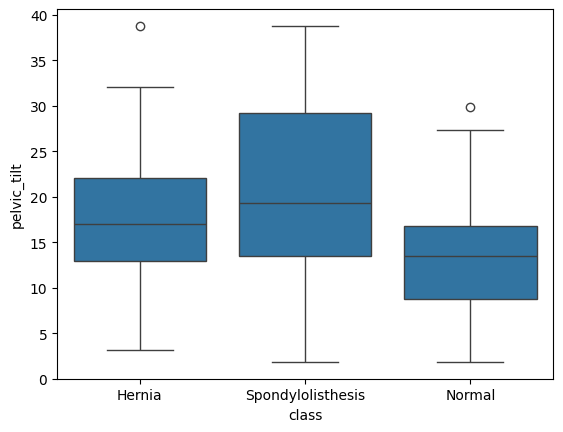

In [3164]:
sns.boxplot(data=df2, x='class', y='pelvic_tilt')
plt.show()

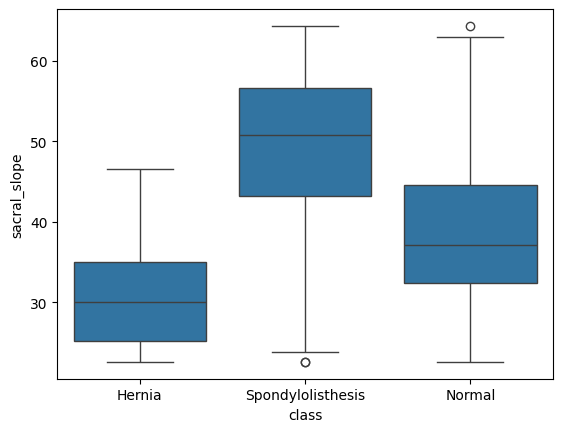

In [3165]:
sns.boxplot(data=df2, x='class', y='sacral_slope')
plt.show()

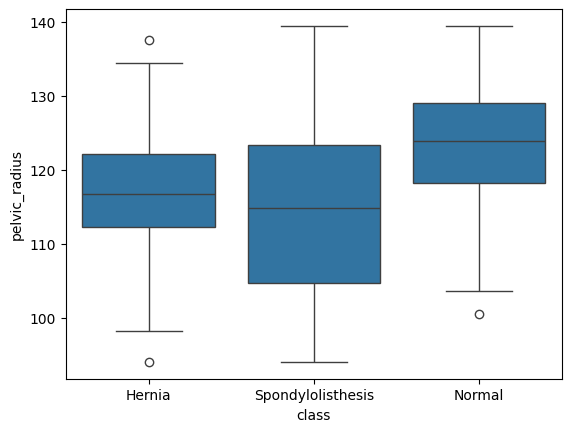

In [3166]:
sns.boxplot(data=df2, x='class', y='pelvic_radius')
plt.show()

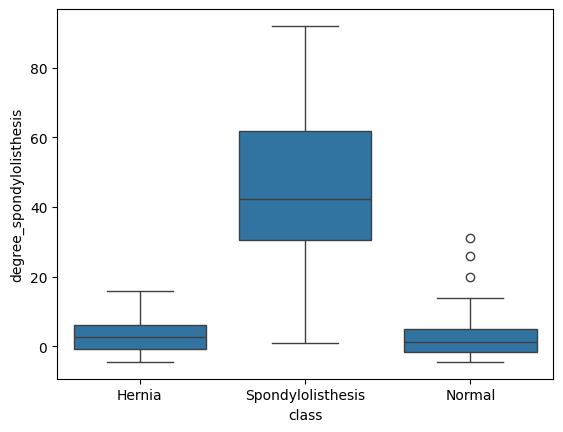

In [3167]:
sns.boxplot(data=df2, x='class', y='degree_spondylolisthesis')
plt.show()

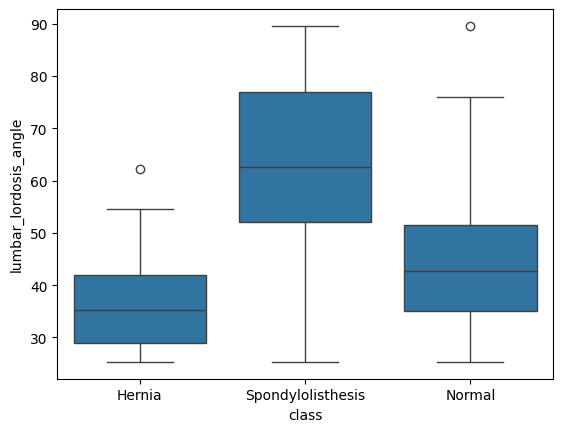

In [3168]:
sns.boxplot(data=df2, x='class', y='lumbar_lordosis_angle')
plt.show()


## Dépendances entre les variables catégorielles :

class          Hernia  Normal  Spondylolisthesis
high_lordosis                                   
0                  56      70                 29
1                   4      30                121


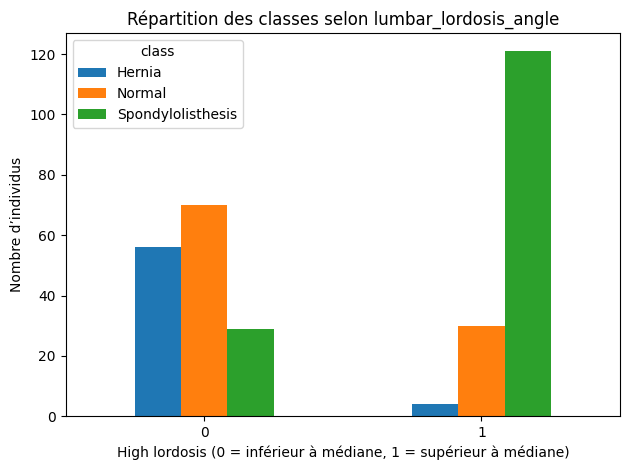

In [3169]:
df2['high_lordosis'] = (df2['lumbar_lordosis_angle'] > df2['lumbar_lordosis_angle'].median()).astype(int)

# Table de contingence
ct = pd.crosstab(df2['high_lordosis'], df2['class'])
print(ct)

# Plot
ct.plot(kind='bar')
plt.xlabel('High lordosis (0 = inférieur à médiane, 1 = supérieur à médiane)')
plt.ylabel('Nombre d’individus')
plt.title('Répartition des classes selon lumbar_lordosis_angle')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

class                  Hernia  Normal  Spondylolisthesis
high_pelvic_incidence                                   
0                          51      72                 32
1                           9      28                118


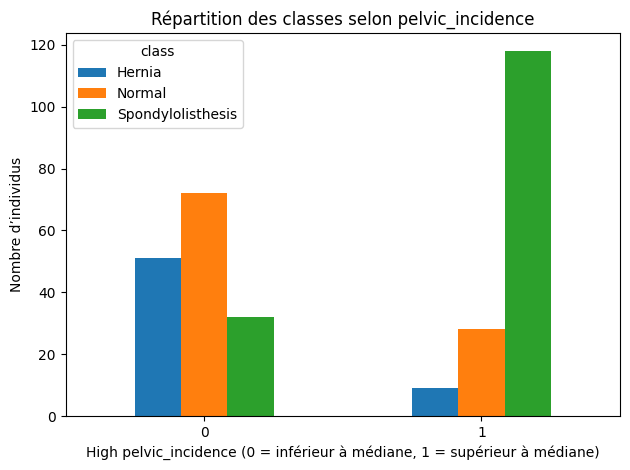

In [3170]:
df2['high_pelvic_incidence'] = (df2['pelvic_incidence'] > df2['pelvic_incidence'].median()).astype(int)

# Table de contingence
ct = pd.crosstab(df2['high_pelvic_incidence'], df2['class'])
print(ct)

# Plot
ct.plot(kind='bar')
plt.xlabel('High pelvic_incidence (0 = inférieur à médiane, 1 = supérieur à médiane)')
plt.ylabel('Nombre d’individus')
plt.title('Répartition des classes selon pelvic_incidence')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

class             Hernia  Normal  Spondylolisthesis
high_pelvic_tilt                                   
0                     28      69                 58
1                     32      31                 92


/tmp/ipython-input-3335485731.py:13: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


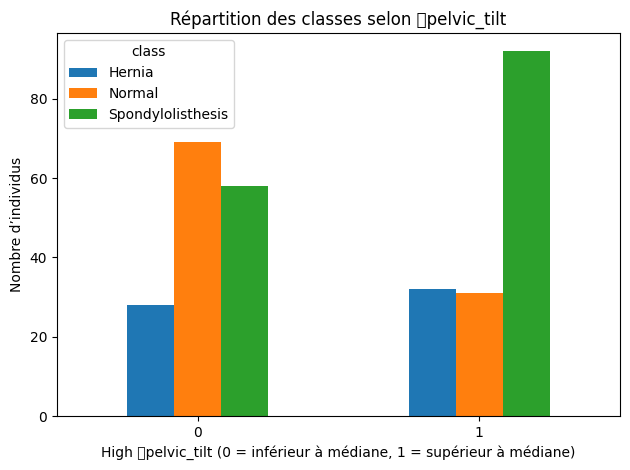

In [3171]:
df2['high_pelvic_tilt'] = (df2['pelvic_tilt'] > df2['pelvic_tilt'].median()).astype(int)

# Table de contingence
ct = pd.crosstab(df2['high_pelvic_tilt'], df2['class'])
print(ct)

# Plot
ct.plot(kind='bar')
plt.xlabel('High 	pelvic_tilt (0 = inférieur à médiane, 1 = supérieur à médiane)')
plt.ylabel('Nombre d’individus')
plt.title('Répartition des classes selon 	pelvic_tilt')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

class              Hernia  Normal  Spondylolisthesis
high_sacral_slope                                   
0                      57      65                 33
1                       3      35                117


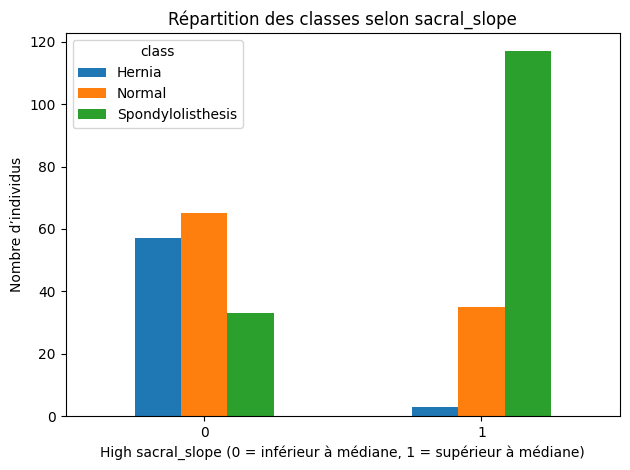

In [3172]:
df2['high_sacral_slope'] = (df2['sacral_slope'] > df2['sacral_slope'].median()).astype(int)

# Table de contingence
ct = pd.crosstab(df2['high_sacral_slope'], df2['class'])
print(ct)

# Plot
ct.plot(kind='bar')
plt.xlabel('High sacral_slope (0 = inférieur à médiane, 1 = supérieur à médiane)')
plt.ylabel('Nombre d’individus')
plt.title('Répartition des classes selon sacral_slope')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

class               Hernia  Normal  Spondylolisthesis
high_pelvic_radius                                   
0                       36      26                 93
1                       24      74                 57


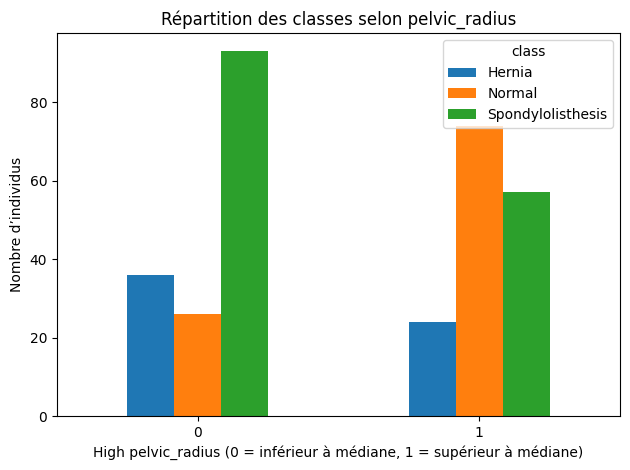

In [3173]:
df2['high_pelvic_radius'] = (df2['pelvic_radius'] > df2['pelvic_radius'].median()).astype(int)

# Table de contingence
ct = pd.crosstab(df2['high_pelvic_radius'], df2['class'])
print(ct)

# Plot
ct.plot(kind='bar')
plt.xlabel('High pelvic_radius (0 = inférieur à médiane, 1 = supérieur à médiane)')
plt.ylabel('Nombre d’individus')
plt.title('Répartition des classes selon pelvic_radius')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

class                          Hernia  Normal  Spondylolisthesis
high_degree_spondylolisthesis                                   
0                                  58      94                  3
1                                   2       6                147


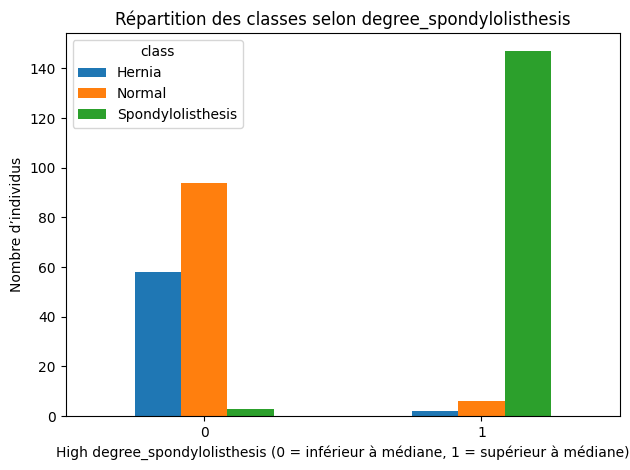

In [3174]:
df2['high_degree_spondylolisthesis'] = (df2['degree_spondylolisthesis'] > df2['degree_spondylolisthesis'].median()).astype(int)

# Table de contingence
ct = pd.crosstab(df2['high_degree_spondylolisthesis'], df2['class'])
print(ct)

# Plot
ct.plot(kind='bar')
plt.xlabel('High degree_spondylolisthesis (0 = inférieur à médiane, 1 = supérieur à médiane)')
plt.ylabel('Nombre d’individus')
plt.title('Répartition des classes selon degree_spondylolisthesis')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Engineering

On normalise les données pour pouvoir les utiliser par la suite dans différents modèles :

In [3175]:
from sklearn.preprocessing import StandardScaler

In [3176]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2.drop('class', axis=1))


On vérifie l'asymétrie des données :

In [3177]:
df2.drop('class', axis=1).skew()

,0
pelvic_incidence,0.204362
pelvic_tilt,0.591625
lumbar_lordosis_angle,0.474626
sacral_slope,0.111067
pelvic_radius,-0.171185
degree_spondylolisthesis,0.905540
high_lordosis,0.000000
high_pelvic_incidence,0.000000
high_pelvic_tilt,0.000000
high_sacral_slope,0.000000


La valeur de "degree_spondylolisthesis" est proche de 1, on applique donc une transformation logarithmique :

In [3178]:
df2['degree_spondylolisthesis_log'] = np.log1p(df2['degree_spondylolisthesis'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Binning : Découpage en classes pour faciliter les interprétations futures

In [3179]:
variables_to_bin = [
    'pelvic_incidence',
    'pelvic_tilt',
    'lumbar_lordosis_angle',
    'sacral_slope',
    'pelvic_radius',
    'degree_spondylolisthesis'
]

for var in variables_to_bin:
    df2[var + '_bin'] = pd.qcut(df2[var], q=3, labels=['low', 'medium', 'high'])


In [3180]:
#Affichage de la table avec les classes créées
bin_cols = [var + '_bin' for var in variables_to_bin]
cols_order = bin_cols + ['class']
df2[cols_order]

,pelvic_incidence_bin,pelvic_tilt_bin,lumbar_lordosis_angle_bin,sacral_slope_bin,pelvic_radius_bin,degree_spondylolisthesis_bin,class
0,medium,high,low,medium,low,low,Hernia
1,low,low,low,low,medium,medium,Hernia
2,high,high,medium,medium,low,low,Hernia
3,high,high,medium,medium,low,medium,Hernia
4,low,low,low,medium,low,medium,Hernia
...,...,...,...,...,...,...,...
305,low,medium,low,low,medium,low,Normal
306,medium,high,low,low,medium,low,Normal
307,medium,high,medium,medium,high,low,Normal
308,low,low,low,medium,medium,low,Normal


On pourra visualiser ça plus tard pour voir la répartition de valeurs hautes ou bases

On va calculer des ratios biomécaniques pertinents, pour faire le lien avec les classes de colonnes vertébrales :

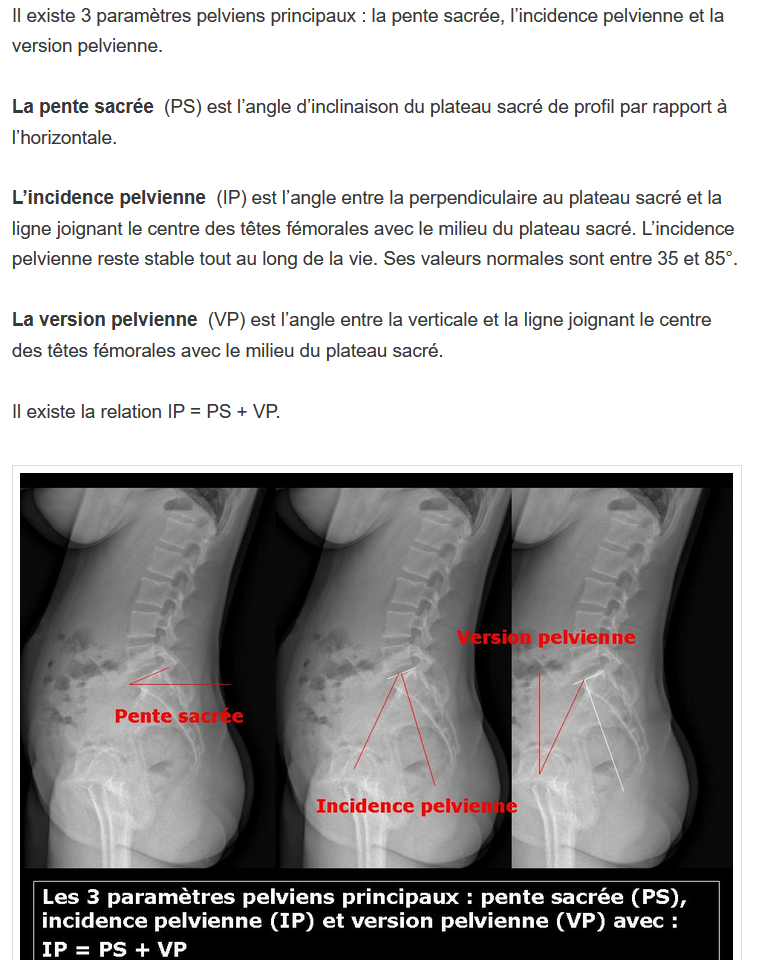

On  commence par le rapport pelvic_tilt/sacral_slope utile pour détecter une compensation posturale :

In [3181]:
df2['VP/PS'] = df2['pelvic_tilt'] / df2['sacral_slope']

In [3182]:
df2[['VP/PS','class']]

,VP/PS,class
0,0.557195,Hernia
1,0.346979,Hernia
2,0.476653,Hernia
3,0.552209,Hernia
4,0.240936,Hernia
...,...,...
305,0.397140,Normal
306,0.623855,Normal
307,0.585652,Normal
308,0.237780,Normal


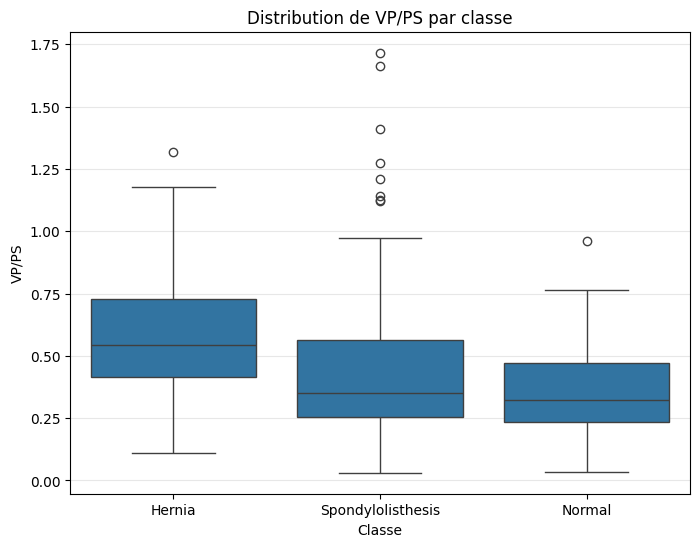

In [3183]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='class', y='VP/PS')

plt.title("Distribution de VP/PS par classe")
plt.xlabel("Classe")
plt.ylabel("VP/PS")
plt.grid(axis='y', alpha=0.3)
plt.show()

On  calcule ensuite le rapport lumbar_lordosis_angle/pelvic_incidence utile pour mesurer l'adaptation du rachis (colonne vertébrale) à la morphologie pelvienne :

In [3184]:
df2['LL/IP'] = df2['lumbar_lordosis_angle'] / df2['pelvic_incidence']

In [3185]:
df2[['LL/IP','class']]

/usr/local/lib/python3.12/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,LL/IP,class
0,0.628439,Hernia
1,0.648375,Hernia
2,0.727746,Hernia
3,0.639439,Hernia
4,0.569619,Hernia
...,...,...
305,0.751510,Normal
306,0.541756,Normal
307,0.751390,Normal
308,0.918907,Normal


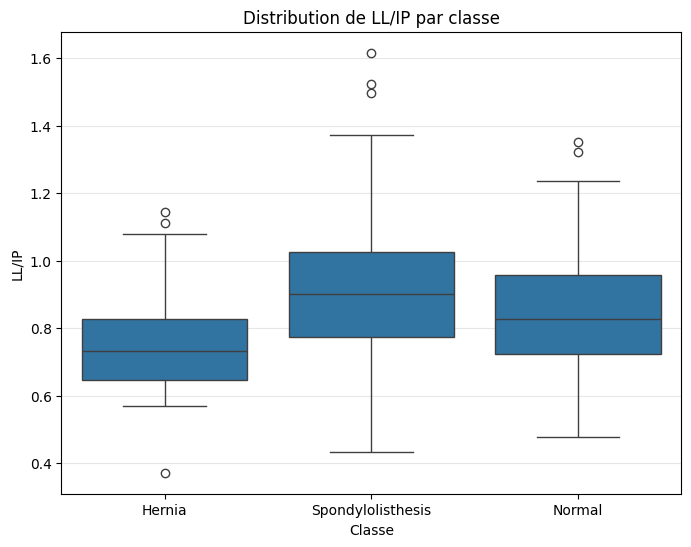

In [3186]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='class', y='LL/IP')

plt.title("Distribution de LL/IP par classe")
plt.xlabel("Classe")
plt.ylabel("LL/IP")
plt.grid(axis='y', alpha=0.3)
plt.show()

Il y a également l'indice (pelvic_tilt + lumbar_lordosis)/sacral_slope qui capture à quel point la lordose (courbure de la colonne vertébrale d'avant en arrière) et la rétroversion (inclinaison en arrière) compensent une pente sacrée réduite :

In [3187]:
df2['VP+LL/PS'] = (df2['pelvic_tilt'] + df2['lumbar_lordosis_angle'])/ df2['sacral_slope']

In [3188]:
df2[['VP+LL/PS','class']]

,VP+LL/PS,class
0,1.535796,Hernia
1,1.220327,Hernia
2,1.551281,Hernia
3,1.544752,Hernia
4,0.947797,Hernia
...,...,...
305,1.447104,Normal
306,1.503587,Normal
307,1.777095,Normal
308,1.375186,Normal


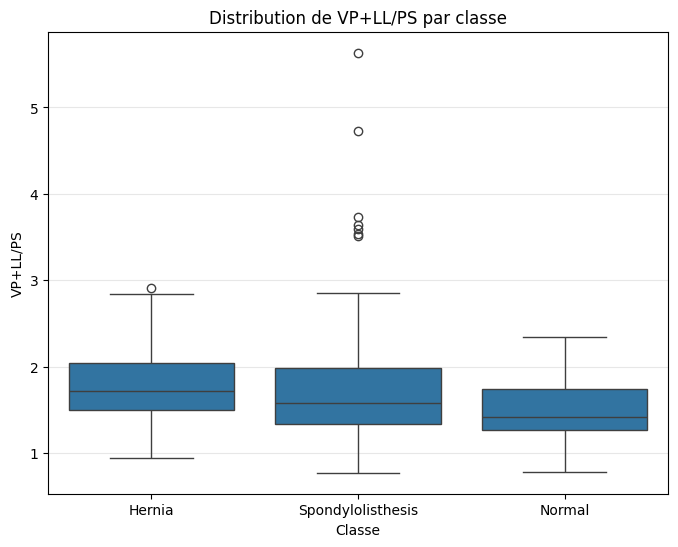

In [3189]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='class', y='VP+LL/PS')

plt.title("Distribution de VP+LL/PS par classe")
plt.xlabel("Classe")
plt.ylabel("VP+LL/PS")
plt.grid(axis='y', alpha=0.3)
plt.show()

Il y a également le rapport degree_spondylolisthesis / pelvic_incidence lié au spondylolisthésis permettant de normaliser la séverité du glissement par la morphologie pelvienne :

In [3190]:
df2['DS/PI'] = df2['degree_spondylolisthesis'] / df2['pelvic_incidence']

In [3191]:
df2[['DS/PI','class']]

,DS/PI,class
0,-0.004036,Hernia
1,0.116862,Hernia
2,-0.051289,Hernia
3,0.161789,Hernia
4,0.159285,Hernia
...,...,...
305,-0.088624,Normal
306,-0.007806,Normal
307,-0.044069,Normal
308,0.004746,Normal


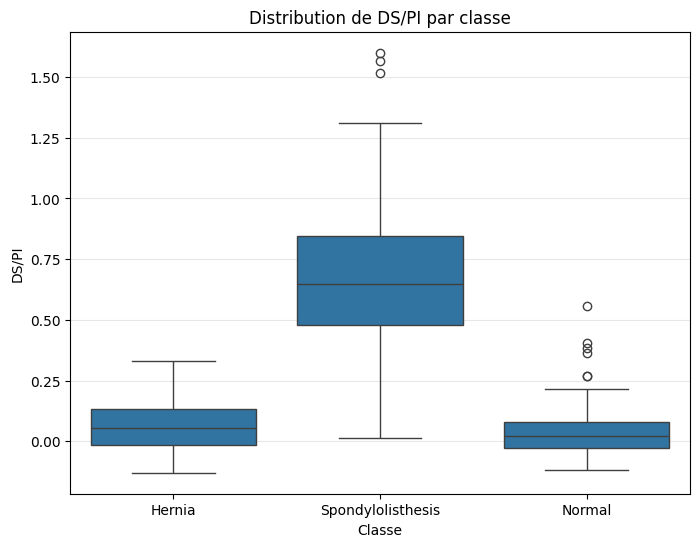

In [3192]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='class', y='DS/PI')

plt.title("Distribution de DS/PI par classe")
plt.xlabel("Classe")
plt.ylabel("DS/PI")
plt.grid(axis='y', alpha=0.3)
plt.show()

On calcule aussi le déficit de lordose, dont un écart important explique certaines pathologies lombaires :

In [3193]:
df2['PI/LL'] = df2['pelvic_incidence'] - df2['lumbar_lordosis_angle']

In [3194]:
df2[['PI/LL','class']]

,PI/LL,class
0,23.418700,Hernia
1,13.733386,Hernia
2,18.739827,Hernia
3,24.985770,Hernia
4,21.395453,Hernia
...,...,...
305,11.903565,Normal
306,24.716214,Normal
307,15.276250,Normal
308,3.669666,Normal


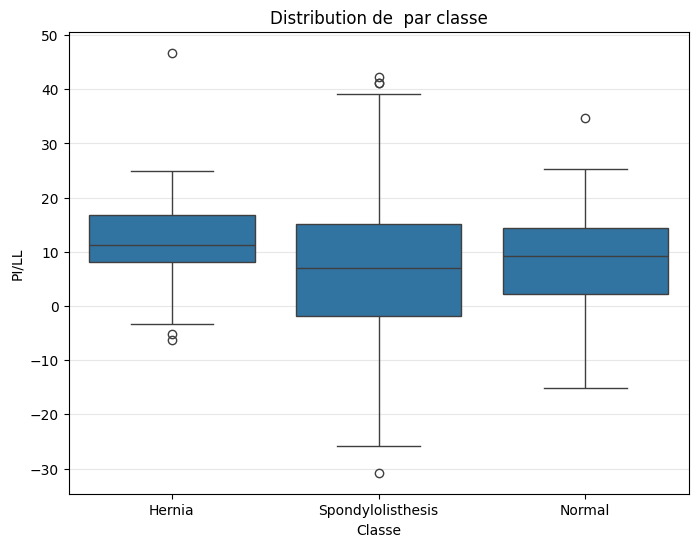

In [3195]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='class', y='PI/LL')

plt.title("Distribution de  par classe")
plt.xlabel("Classe")
plt.ylabel("PI/LL")
plt.grid(axis='y', alpha=0.3)
plt.show()

Enfin il y a le rapport lordose compensé qui évalue la cohérence de l'orientation de la lordose avec le sacrum :

In [3196]:
df2['LL/PS'] = df2['lumbar_lordosis_angle'] - df2['sacral_slope']

In [3197]:
df2[['LL/PS','class']]

,LL/PS,class
0,-0.866115,Hernia
1,-3.672395,Hernia
2,3.478655,Hernia
3,-0.332892,Hernia
4,-11.743378,Hernia
...,...,...
305,1.713123,Normal
306,-3.994717,Normal
307,7.418719,Normal
308,5.023491,Normal


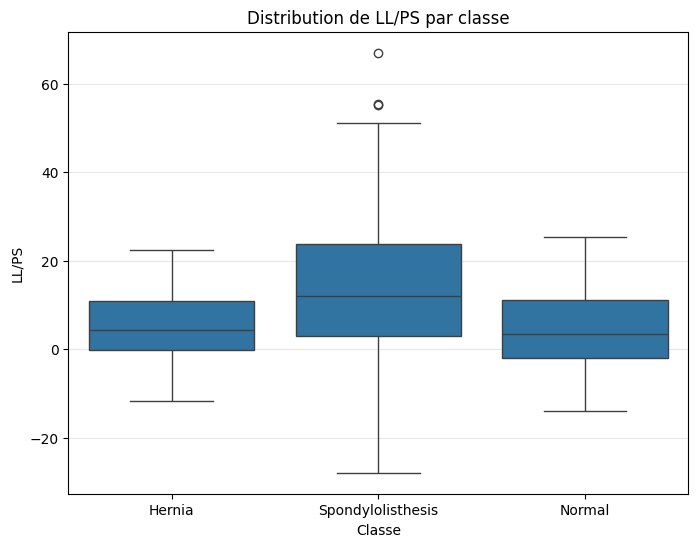

In [3198]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='class', y='LL/PS')

plt.title("Distribution de LL/PS par classe")
plt.xlabel("Classe")
plt.ylabel("LL/PS")
plt.grid(axis='y', alpha=0.3)
plt.show()

Les différents ratios permettent de mettre en relation deux des six paramètres mesurés pour obtenir une nouvelle information. Mais les mesures du pelvic_radius ne sont utilisées nulle part.

On peut emmetre l'hypothèse que la raison est que cette mesure est assez peu variable d'un individu à l'autre et n'apporte pas de réelles informations utiles dans le cadre de l'étude.

On peut valider (ou non) cette hypothèse avec un mutual information.

In [3199]:
# On isole les variables pour les mettre en x.
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

X = df2[features]
y = df2['class']


# Mutual Information
mi = mutual_info_classif(X, y, random_state=0)

# Transformation en DataFrame
mi_df = pd.DataFrame({
    'Variable': features,
    'Mutual_Information': mi
}).sort_values(by='Mutual_Information', ascending=False)

mi_df

,Variable,Mutual_Information
5,degree_spondylolisthesis,0.597513
2,lumbar_lordosis_angle,0.271920
3,sacral_slope,0.249666
0,pelvic_incidence,0.242789
4,pelvic_radius,0.101288
1,pelvic_tilt,0.076427


Grâce au mutual information, on observe que l'hypothèse est fausse. Le paramètre le moins important n'est pas le pelvic_radius (même si il reste peu important) mais le pelvic_tilt.

Nous pouvons également observer que le paramètre le plus important est le degree_spondylolisthesis.

## Encodage

On fait un premier encodage pour distinguer les perosnnes en bonnes santé des personnes souffrantes.

0 correspond aux personnes en bonne santé et 1 aux personnes souffrantes.

In [3200]:
df2["sante_encodage"] = df2["class"].apply(lambda x: 0 if x.lower() == "normal" else 1)

On fait un autre type d'encodage qui précisera la nature des pathologie (ou si une personne est en bonne santé).

0 correspond aux personnes en bonne santé et 1 aux personnes souffrantes d'hernie et 2 aux personnes souffrantes de spondylolisthesis.

In [3201]:
def encode_pathologie(x):
    x = x.lower()
    if x == "normal":
        return 0
    elif x == "hernia":
        return 1
    else:
        return 2

df2["pathologie_encodage"] = df2["class"].apply(encode_pathologie)

On affiche le dataframe avec les nouvelles données!;

In [3202]:
df2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,high_lordosis,high_pelvic_incidence,high_pelvic_tilt,...,pelvic_radius_bin,degree_spondylolisthesis_bin,VP/PS,LL/IP,VP+LL/PS,DS/PI,PI/LL,LL/PS,sante_encodage,pathologie_encodage
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia,0,1,1,...,low,low,0.557195,0.628439,1.535796,-0.004036,23.418700,-0.866115,1,1
1,39.056951,10.060991,25.323565,28.995960,114.405425,4.564259,Hernia,0,0,0,...,medium,medium,0.346979,0.648375,1.220327,0.116862,13.733386,-3.672395,1,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia,1,1,1,...,low,low,0.476653,0.727746,1.551281,-0.051289,18.739827,3.478655,1,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia,0,1,1,...,low,medium,0.552209,0.639439,1.544752,0.161789,24.985770,-0.332892,1,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia,0,0,0,...,low,medium,0.240936,0.569619,0.947797,0.159285,21.395453,-11.743378,1,1


## Graphique multivarié : PCA

Le graphique PCA est une méthode permettant de visualiser en deux dimensions des données en trois ou plus dimensions (dans notre cas six). Pour cela, cette méthode crée des axes x et y basés sur l'influence des différentes variables sur les deux axes respectifs.

Ce graphique permet de visualiser la position des classes selon les variables et si ils forment des clusters.

In [3203]:
# Sélection des features
# On enlève la colonne "class" et les colonnes d'encodage
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

X = df2[features]
y = df2['class']   # labels pour colorer le graphique

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (2 composantes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Conversion en dataframe
df_pca = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'class': y
})

df_pca

,PCA1,PCA2,class
0,-0.295844,-1.040094,Hernia
1,-2.435336,-0.350406,Hernia
2,0.242122,-0.818265,Hernia
3,0.403646,-0.785307,Hernia
4,-1.500938,-1.121770,Hernia
...,...,...,...
305,-1.718750,-0.186848,Normal
306,-1.387126,0.052778,Normal
307,-0.589044,0.694806,Normal
308,-1.694945,-0.420115,Normal


On affiche le "loading", c'est à dire un tableau qui montre l'influence de chaque paramètres sur les axes x et y du graphique PCA.

Plus le résultat est proche de 1, plus la variable à un impact important (plus c'est proche de -1, plus l'influence est importante mais opposée).

In [3204]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PCA1', 'PCA2'],
    index=features
)

print("Loadings (importance des variables dans chaque axe) :")
loadings

Loadings (importance des variables dans chaque axe) :


,PCA1,PCA2
pelvic_incidence,0.518236,-0.005316
pelvic_tilt,0.338197,0.506582
lumbar_lordosis_angle,0.472743,0.056098
sacral_slope,0.421744,-0.420739
pelvic_radius,-0.141227,0.725551
degree_spondylolisthesis,0.442442,0.191713


Grâce au loading on peut observer que les deux paramètres les plus influents pour l'axe x sont pelvic_incidence et lumbar_lordosis_angle. Pour l'axe y c'est pelvic_radius et pelvic_tilt.

On affiche le graphique :

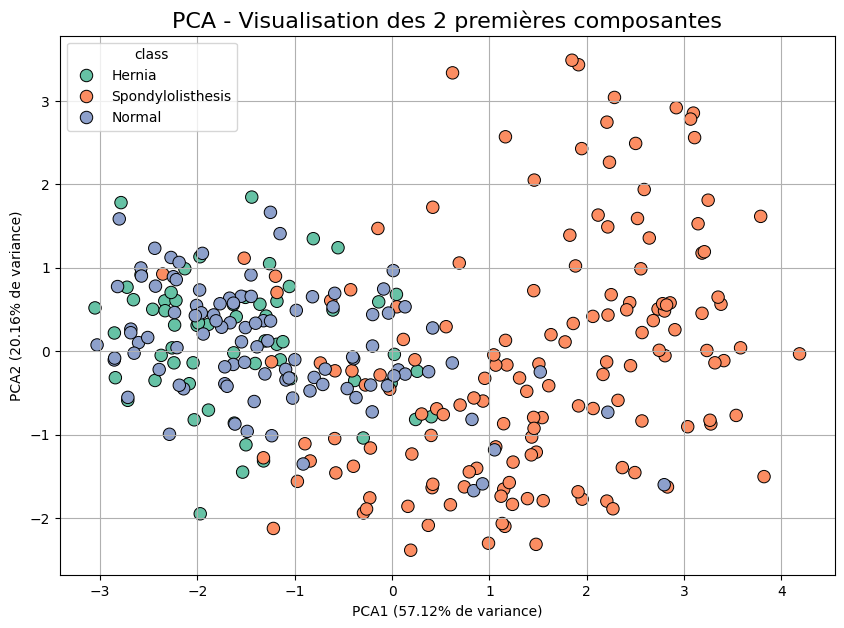

Variance expliquée par PCA1 et PCA2 :
[0.57119628 0.20156291]


In [3205]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='class', palette='Set2', s=80, edgecolor='black')

plt.title("PCA - Visualisation des 2 premières composantes", fontsize=16)
plt.xlabel("PCA1 (%.2f%% de variance)" % (pca.explained_variance_ratio_[0] * 100))
plt.ylabel("PCA2 (%.2f%% de variance)" % (pca.explained_variance_ratio_[1] * 100))
plt.grid(True)
plt.show()

print("Variance expliquée par PCA1 et PCA2 :")
print(pca.explained_variance_ratio_)

Visuellement on peut observer que la classe Spondylolisthesis forme un pseudo cluster. Il est majoritairement présent dans la partie droite du graphique, avec une tendance vers le haut.

Les classes normales et hernies sont plus présent à gauche du graphique mais il n'y a pas de différences notable entre les deux.

panda get dummies


# Entrainement par Regression Logistique Multiclasses

In [3206]:
# Select only the original 6 numerical features for X
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
X = df2[features]

y = df2["class"]

In [3207]:
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (310, 6) Dimension:  2
Shape:  (310,) Dimension:  1


In [3208]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [3209]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [3210]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [3211]:
log_model = LogisticRegression()

# Essayer de MinMax scaled

In [3212]:
# Fit the model
# Increased max_iter for convergence
log_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3213]:
predictions = log_model.predict(X_test)

In [3214]:
y_test.values

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Hernia', 'Hernia', 'Spondylolisthesis', 'Hernia', 'Normal',
       'Normal', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Spondylolisthesis',
       'Hernia', 'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Normal', 'Spondylolisthesis', 'Normal', 'Hernia',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Normal', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis', 'Hernia',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesi

In [3215]:
predictions

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Hernia', 'Hernia', 'Spondylolisthesis', 'Hernia', 'Normal',
       'Normal', 'Normal', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Normal', 'Spondylolisthesis', 'Normal', 'Hernia',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Hernia', 'Normal', 'Spondylolisthesis',
       'Spondylol

In [3216]:
from sklearn.metrics import confusion_matrix

In [3217]:
confusion_matrix(y_test, predictions)

array([[ 6,  3,  0],
       [ 2, 20,  1],
       [ 0,  1, 29]])

In [3218]:
from sklearn.metrics import accuracy_score

In [3219]:
accuracy_score(y_test, predictions)

0.8870967741935484